## **Estudios hechos para PM25**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time

guardar_imagenes = False

In [2]:
datosContaminantes = pd.read_csv("CSV_Datos_OK.csv", parse_dates={"Fecha":["Año", "Mes", "Día"]})
datosContaminantes = datosContaminantes.drop(["Minuto", "Segundo"], axis=1)
datosContaminantes

,Fecha,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-11-27,12,43.0000,1,1,12,pm25
1,2012-11-27,13,22.0000,1,1,12,pm25
2,2012-11-27,14,31.0000,1,1,12,pm25
3,2012-11-27,15,29.0000,1,1,12,pm25
4,2012-11-27,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...
1185035,2022-07-31,19,10.6495,1,1,86,pm25
1185036,2022-07-31,20,9.4167,1,1,86,pm25
1185037,2022-07-31,21,15.2623,1,1,86,pm25
1185038,2022-07-31,22,16.4119,1,1,86,pm25


Limpieza de los datos para evitar errores y dejarlos ordenados:

In [3]:
# obtener las semanas, los años, los dias y los meses para cada año
def getWeek(df):
    return int( df.strftime('%W') )

def getYear(df):
    return df.year

def getDay(df):
    return df.day

def getMonth(df):
    return df.month

# Funcion para convertir valores str en float
def ToFloat(df):
    if isinstance(df, str):
        if df.count('.') == 2:
            return float( df.replace('.', '', 1) )
        else:
            return float(df)
    else:
        return float(df)

# Funcion para extraer los dias de la semana
def DayOfWeek(df):
    return df.strftime('%A')

# funcion para concatenar dos listas, elemento a elemento
def addLists(firstList, secondList):
    finalList= []
    for i in range( len(firstList) ):
        finalList.append( str(firstList[i]) + '-' + str(secondList[i]) )
    return finalList

In [4]:
# Reemplazando valores en la columna a aplicar la funcion ToFloat
datosContaminantes["valor_contaminante"] = datosContaminantes["valor_contaminante"].apply(ToFloat)

# insertando los dias
datosContaminantes.insert(1, "Dia_Semana", np.array( datosContaminantes["Fecha"].apply(DayOfWeek) ) )

# eliminando valores no permitidos
datosContaminantes = datosContaminantes[(datosContaminantes["valor_contaminante"] >= 0.0) & \
                                        (datosContaminantes["valor_contaminante"] != 999.0) & \
                                        (datosContaminantes["calidad_contaminante"] != 151)]

# ordenando y mostrando
datosContaminantes = datosContaminantes.sort_values(by=["Fecha", "Hora"]).reset_index().drop("index", axis=1)

datosContaminantes.insert( 1, "año", datosContaminantes["Fecha"].apply(getYear) )
datosContaminantes.insert( 1, "mes", datosContaminantes["Fecha"].apply(getMonth) )
datosContaminantes.insert( 1, "semana", datosContaminantes["Fecha"].apply(getWeek) )
datosContaminantes.insert( 1, "dia", datosContaminantes["Fecha"].apply(getDay) )

# se guarda como .csv
#datosContaminantes.to_csv("datosContaminantes.csv", index=False)

datosContaminantes

,Fecha,dia,semana,mes,año,Dia_Semana,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-09-18,18,38,9,2012,Tuesday,12,16.0000,1,1,25,pm25
1,2012-09-18,18,38,9,2012,Tuesday,13,18.0000,1,1,25,pm25
2,2012-09-18,18,38,9,2012,Tuesday,14,18.0000,1,1,25,pm25
3,2012-09-18,18,38,9,2012,Tuesday,15,17.0000,1,1,25,pm25
4,2012-09-18,18,38,9,2012,Tuesday,16,17.0000,1,1,25,pm25
...,...,...,...,...,...,...,...,...,...,...,...,...
1185035,2022-08-31,31,35,8,2022,Wednesday,19,113.3006,1,1,6,nox
1185036,2022-08-31,31,35,8,2022,Wednesday,20,46.5652,1,1,6,nox
1185037,2022-08-31,31,35,8,2022,Wednesday,21,51.3882,1,1,6,nox
1185038,2022-08-31,31,35,8,2022,Wednesday,22,88.6126,1,1,6,nox


Una vez exportado el archivo .csv, será solo cuestión de leerlo para trabajar más cómodamente:

In [5]:
promedioSemanalContaminantes_df = pd.read_csv('promedioSemanalContaminantes.csv').drop('Unnamed: 0', axis=1)

promedioSemanalContaminantes_df

,fecha,año,semana,estacion,contaminante,promedio_contaminante
0,2012-38,2012,38,25,pm25,23.757576
1,2012-39,2012,39,25,pm25,24.970238
2,2012-40,2012,40,25,pm25,25.166667
3,2012-41,2012,41,25,pm25,30.071942
4,2012-42,2012,42,25,pm25,21.074468
...,...,...,...,...,...,...
7547,2022-31,2022,31,6,nox,83.362565
7548,2022-32,2022,32,6,nox,71.502226
7549,2022-33,2022,33,6,nox,71.404375
7550,2022-34,2022,34,6,nox,77.548579


De manera alternativa, podemos ejecutar una instruccion `groupby()` para tener los datos por promedio de semana:

In [6]:
promedio_semanal_contaminantes = datosContaminantes.groupby(["año", "semana", "estacion", "contaminante"]).mean()
promedio_semanal_contaminantes = promedio_semanal_contaminantes.reset_index()
fechas = addLists(
    promedio_semanal_contaminantes["año"], promedio_semanal_contaminantes["semana"]
)

promedio_semanal_contaminantes.insert(0, "Fecha", fechas)

In [7]:
# para tener un mismo eje x

fechas_para_x = datosContaminantes[['año', 'semana']].copy()

fechas_para_x['año-semana'] = addLists(
    fechas_para_x['año'], fechas_para_x['semana']
)

fechas_para_x = np.array( fechas_para_x['año-semana'].unique() )
#fechas_para_x

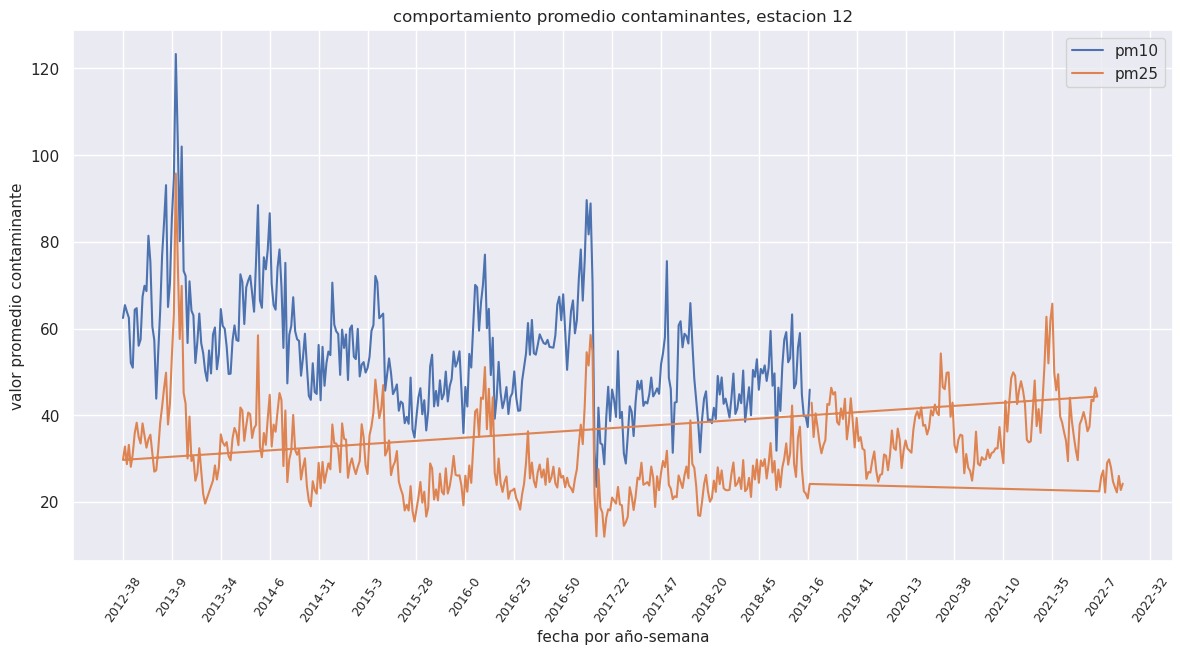

In [8]:
estacion = 12
contaminantes = ['pm10', 'pm25']

# para cualquier estacion
intervalo = list(range(0, len(fechas_para_x), 25))

eje_horizontal = [
    fechas_para_x[i] for i in intervalo
]

sns.set_theme(style="dark")

fig = plt.figure(1, figsize=(12, 12))
ax = fig.add_subplot(212)

ax.xaxis.set_ticks(intervalo)  # valores uniformemente espaciados
ax.xaxis.set_ticklabels(eje_horizontal)  # nombres de fechas en el eje x

for contaminante in contaminantes:

    fechas = np.array(promedio_semanal_contaminantes[
            (promedio_semanal_contaminantes['estacion'] == estacion) & \
            (promedio_semanal_contaminantes['contaminante'] == contaminante)
        ]['Fecha'])
	
    valores = np.array(promedio_semanal_contaminantes[
        (promedio_semanal_contaminantes['estacion'] == estacion) & \
        (promedio_semanal_contaminantes['contaminante'] == contaminante)
    ]['valor_contaminante'])

    plt.plot(
        fechas,
        valores,
        label=f'{contaminante}'
    )

plt.xticks(rotation=55, fontsize=9)

plt.xlabel('fecha por año-semana', fontsize=11); plt.ylabel('valor promedio contaminante', fontsize=11)
plt.grid()

plt.legend(); plt.tight_layout()
plt.title(f'comportamiento promedio contaminantes, estacion {estacion}')
plt.show()

## **Media móvil para los promedios**

*Nota: generalizar la media movil para dataframes sobre los que se les haya hecho un groupby*

In [9]:
def xAxisFix(rango=30):

    fechas_para_x = datosContaminantes[['año', 'semana']].copy()

    fechas_para_x['año-semana'] = addLists(
        fechas_para_x['año'], fechas_para_x['semana']
    )

    fechas_para_x = np.array( fechas_para_x['año-semana'].unique() )

    intervalo = list(range(0, len(fechas_para_x), rango))

    eje_horizontal = [
        fechas_para_x[i] for i in intervalo
    ]

    return (intervalo, eje_horizontal)

def plotMediaMovil(estacion, contaminante, valores=5, rango_x=30):

    intervalo, eje_horizontal = xAxisFix(rango=rango_x)

    fig = plt.figure(figsize=(13, 14))
    ax = fig.add_subplot(212)

    ax.xaxis.set_ticks(intervalo)  # valores uniformemente espaciados
    ax.xaxis.set_ticklabels(eje_horizontal)  # nombres de fechas en el eje x
    plt.xticks(rotation=55, fontsize=9)

    fechas = promedioSemanalContaminantes_df[
        (promedioSemanalContaminantes_df['estacion'] == estacion) & \
        (promedioSemanalContaminantes_df['contaminante'] == contaminante)
    ]['fecha']

    media_movil = promedioSemanalContaminantes_df[
        (promedioSemanalContaminantes_df['estacion'] == estacion) & \
        (promedioSemanalContaminantes_df['contaminante'] == contaminante)
    ]['promedio_contaminante'].rolling(valores).mean()

    sns.set_theme(style='dark')

    plt.plot(fechas, media_movil, label=f'media movil a {valores} valores del contaminante {contaminante}')

    plt.grid(); plt.title(f'Estacion {estacion}', size=15); plt.legend()
    plt.xlabel('fechas por año-semana', size=15);  plt.ylabel('valor promedio del contaminante', size=15)

    plt.show()

    pass

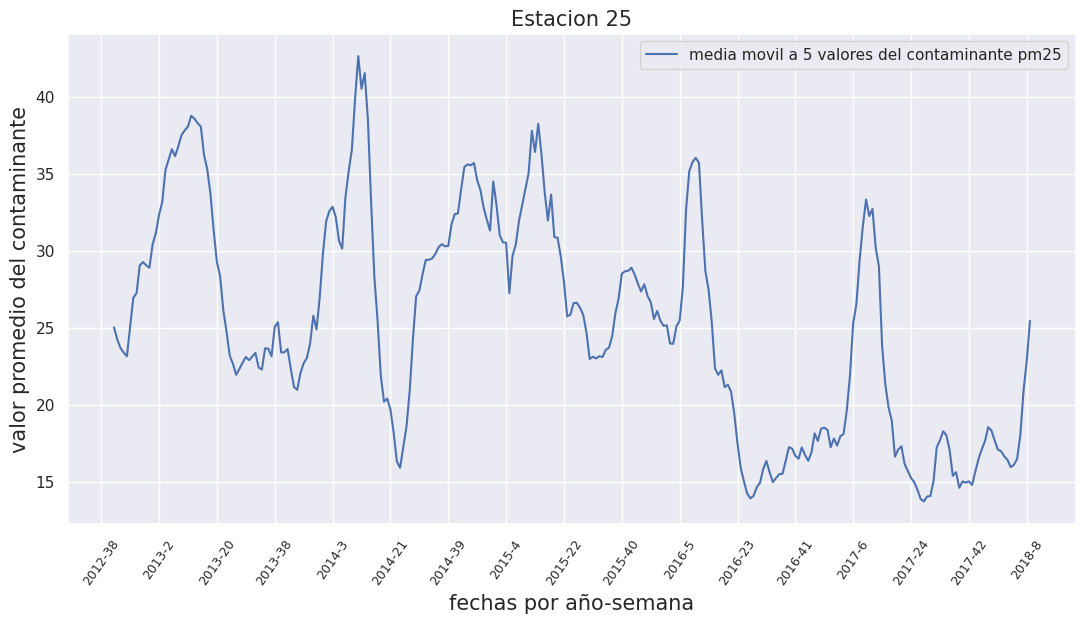

In [10]:
plotMediaMovil(25, 'pm25', rango_x=18)

Vamos a extraer la gráfica para todos los contaminantes de todas las estaciones:

In [ ]:
contaminantes = promedioSemanalContaminantes_df['contaminante'].unique()
estaciones = promedioSemanalContaminantes_df['estacion'].unique()

for estacion in estaciones:
    for contaminante in contaminantes:
        plotMediaMovil(estacion, contaminante, rango_x=18)

## **Análisis de correlación**

In [11]:
promedioSemanalContaminantes_df

,fecha,año,semana,estacion,contaminante,promedio_contaminante
0,2012-38,2012,38,25,pm25,23.757576
1,2012-39,2012,39,25,pm25,24.970238
2,2012-40,2012,40,25,pm25,25.166667
3,2012-41,2012,41,25,pm25,30.071942
4,2012-42,2012,42,25,pm25,21.074468
...,...,...,...,...,...,...
7547,2022-31,2022,31,6,nox,83.362565
7548,2022-32,2022,32,6,nox,71.502226
7549,2022-33,2022,33,6,nox,71.404375
7550,2022-34,2022,34,6,nox,77.548579


In [12]:
def correlacion(df, primerContaminante, segundoContaminante, estacion, rango_x=30, set_logscale=False):

    valores = 'valor_contaminante'

    if "promedio_contaminante" in df.columns:
        valores = 'promedio_contaminante'

    dataInX = np.array(
        df[
            (df['contaminante'] == primerContaminante) & \
            (df['estacion'] == estacion)
        ][valores]
    )

    dataInY = np.array(
        df[
            (df['contaminante'] == segundoContaminante) & \
            (df['estacion'] == estacion)
        ][valores]
    )

    # probar opcion de simular datos cogiéndolos de forma aleatoria
    if (len(dataInX) > len(dataInY)):
        dataInY = np.concatenate(
            ( dataInY, np.random.choice( dataInY, len(dataInX)-len(dataInY) ) ), axis=0
        )
    elif (len(dataInX) < len(dataInY)):
        dataInX = np.concatenate(
            ( dataInX, np.random.choice( dataInX, len(dataInY)-len(dataInX) ) ), axis=0
        )
    
    sns.set_theme(style="dark")
    fig = plt.figure(figsize=(9, 6))

    plt.scatter(
        dataInX, dataInY, alpha=0.8
    )

    plt.grid(); plt.tight_layout()
    plt.xlabel(f"promedio valores {primerContaminante}")
    plt.ylabel(f"promedio valores {segundoContaminante}")

    if set_logscale:
        plt.xscale("log");  plt.yscale("log")

    plt.title(f"correlacion entre {primerContaminante} y {segundoContaminante}, estación {estacion}")

    plt.show()

    pass


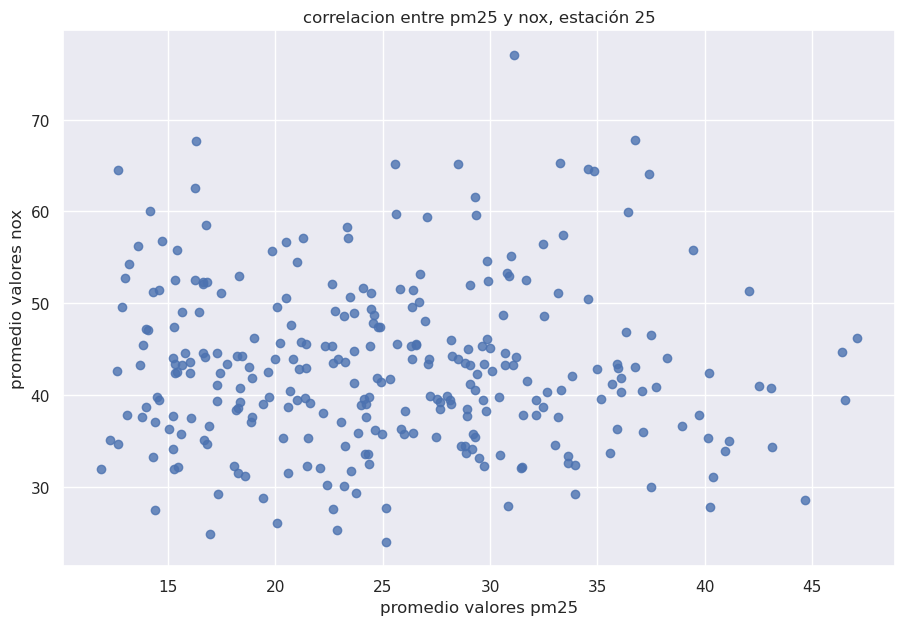

In [13]:
# correlacion de promedio semanal para dos contaminantes
correlacion(promedioSemanalContaminantes_df, "pm25", "nox", 25)

In [14]:
def scatterContaminantes(primerContaminante, segundoContaminante, estacion, rango_x=30):
    
    intervalo, eje_horizontal = xAxisFix(rango=rango_x)

    dataToAnalize = promedioSemanalContaminantes_df[
        (promedioSemanalContaminantes_df['estacion'] == estacion) &
        (
            (promedioSemanalContaminantes_df['contaminante'] == primerContaminante) | \
            (promedioSemanalContaminantes_df['contaminante'] == segundoContaminante)
        )
    ]
    
    fig = plt.figure(figsize=(13, 14))
    ax = fig.add_subplot(212)

    ax.xaxis.set_ticks(intervalo)  # valores uniformemente espaciados
    ax.xaxis.set_ticklabels(eje_horizontal)  # nombres de fechas en el eje x
    plt.xticks(rotation=55, fontsize=9)

    sns.set(rc={'figure.figsize':(9, 6)})

    sns.scatterplot(
        data = dataToAnalize,
        x = 'fecha',
        y = 'promedio_contaminante',
        hue = 'contaminante',
        alpha=0.5
    )

    plt.xlabel("fechas por año-semana")
    plt.ylabel("promedio valores de contaminantes")
    plt.title(f"distribucion por semana, contaminantes {primerContaminante} y {segundoContaminante}")
    plt.tight_layout()
    plt.show()

    pass

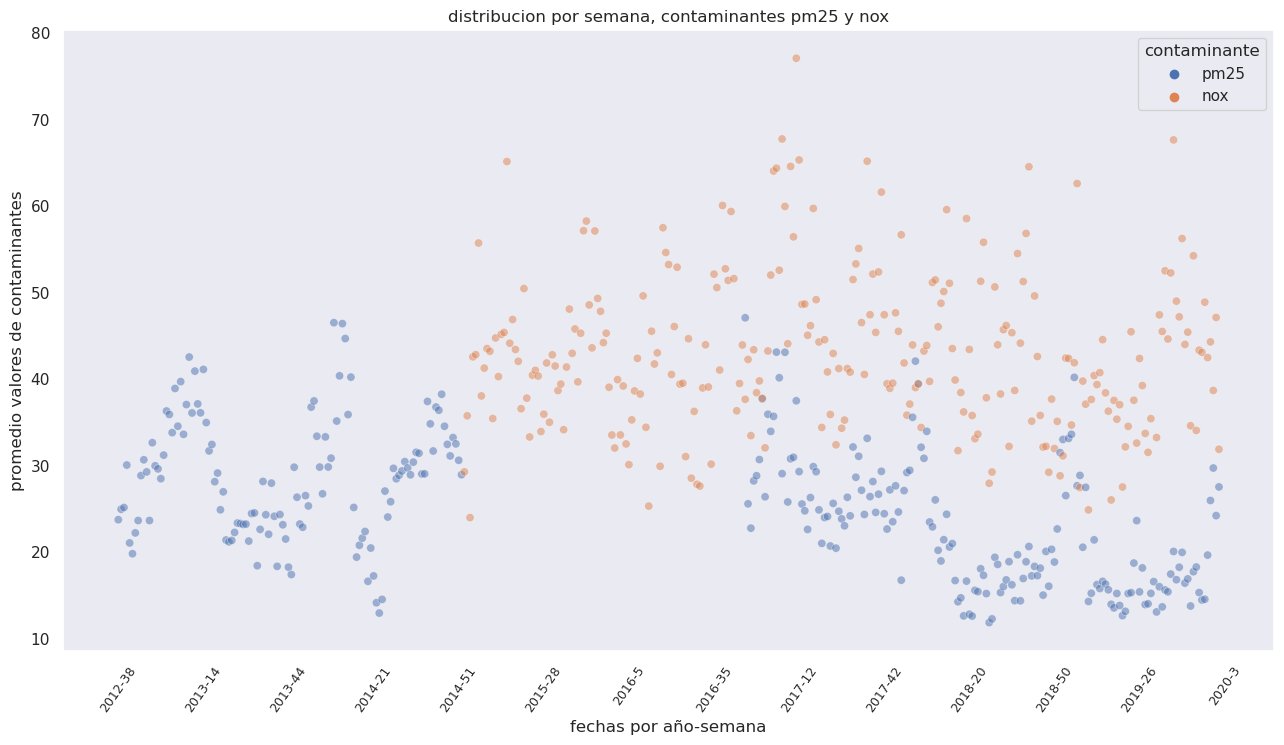

In [15]:
scatterContaminantes('pm25', 'nox', 25)

In [16]:
def correlacionDistribucion(primerContaminante, segundoContaminante, estacion, rango_x=30):
    
    dataInX = np.array(
        promedioSemanalContaminantes_df[
            (promedioSemanalContaminantes_df['contaminante'] == primerContaminante) & \
            (promedioSemanalContaminantes_df['estacion'] == estacion)
        ]["promedio_contaminante"]
    )

    dataInY = np.array(
        promedioSemanalContaminantes_df[
            (promedioSemanalContaminantes_df['contaminante'] == segundoContaminante) & \
            (promedioSemanalContaminantes_df['estacion'] == estacion)
        ]["promedio_contaminante"]
    )

    # probar opcion de simular datos cogiéndolos de forma aleatoria
    if (len(dataInX) > len(dataInY)):
        dataInY = np.concatenate(
            ( dataInY, np.random.choice( dataInY, len(dataInX)-len(dataInY) ) ), axis=0
        )
    elif (len(dataInX) < len(dataInY)):
        dataInX = np.concatenate(
            ( dataInX, np.random.choice( dataInX, len(dataInY)-len(dataInX) ) ), axis=0
        )
    
    # dataframe con los datos igualmente dimensionados
    dataToAnalize = pd.DataFrame(
        data={f"{primerContaminante}":dataInX, f"{segundoContaminante}":dataInY}
    )

    sns.set_theme(style="dark", rc={'figure.figsize':(9, 6)})

    visual = sns.JointGrid(
        data = dataToAnalize,
        x = f"{primerContaminante}",
        y = f"{segundoContaminante}"
    )

    visual.plot_joint(sns.scatterplot, alpha=0.6)
    visual.plot_marginals(sns.histplot, kde=True)

    #plt.title(f"correlacion entre {primerContaminante} y {segundoContaminante}, estación {estacion}")
    plt.tight_layout()
    #plt.xlabel(f"promedio valores {primerContaminante}")
    #plt.ylabel(f"promedio valores {segundoContaminante}")

    plt.show()

    pass

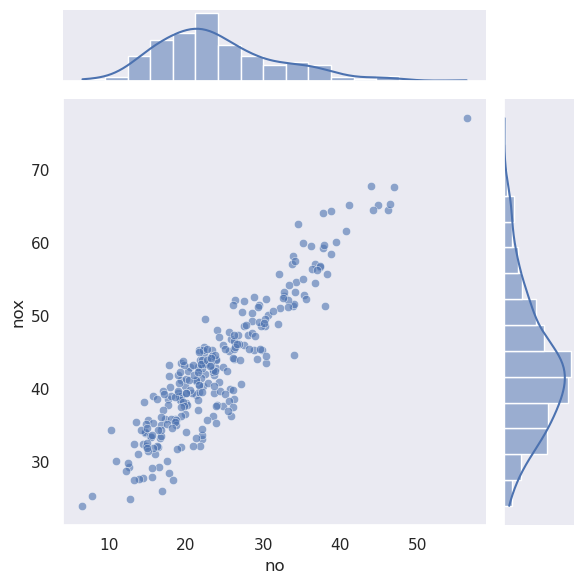

In [17]:
correlacionDistribucion("no", "nox", 25)

### **Extracción y análisis a partir de una muestra aleatoria**

In [18]:
def plotByDay(dia="Friday"):

    dfDia = muestraPM25[ muestraPM25["Dia_Semana"] == dia ].copy()

    dfDia.insert(
        1, "fecha año-semana", addLists( np.array(dfDia["año"]), np.array(dfDia["semana"]) )
    )

    sns.set_theme(style='dark')
    sns.set(rc={'figure.figsize':(9, 5)})

    sns.lineplot(
        data = dfDia,
        x = "fecha año-semana",
        y = "valor_contaminante",
        ci = False,
        alpha = 0.8
    )

    elements = [ np.array(dfDia["fecha año-semana"])[i] for i in range(0, len(dfDia["fecha año-semana"]), 10) ]

    plt.legend(); plt.tight_layout(); plt.grid()
    plt.xticks(elements, fontsize=8, rotation=50)
    plt.title(f"valor del contaminante PM2.5 para el dia {dia} por semanas")
    plt.xlabel("fecha por año-semana"); plt.ylabel("valor del contaminante");

    plt.show()
    
    pass

In [ ]:
plotByDay(dia="Friday")

In [35]:
muestraPM25["valor_contaminante"].describe()

count    2000.000000
mean       24.502800
std        16.103694
min         0.000000
25%        13.415575
50%        20.846050
75%        31.000000
max       137.000000
Name: valor_contaminante, dtype: float64

## **Análisis por día, correlación general**

In [19]:
def correlacionContaminantes(df, estacion):
    
    sizes = [];  values = {};  newValues = []
    current = df[ df['estacion'] == estacion ]
    contaminantes = current['contaminante'].unique()

    for contaminante in contaminantes:
        size = current['contaminante'].value_counts()[contaminante]
        sizes.append( [size, contaminante] )
    
    sizes = sorted(sizes)
    sizes = np.array(sizes)
    contaminantesOrdenados = sizes.T[1]
    mayor = int(sizes.T[0][-1])

    for contaminante in contaminantesOrdenados:
        newValues = np.array( current[ current['contaminante'] == contaminante ]['valor_contaminante'] )
        if len(newValues) < mayor:
            newValues = np.concatenate(
                ( newValues, np.random.choice(newValues, mayor-len(newValues)) ), axis = 0
            )
        values[contaminante] = newValues
    
    values = pd.DataFrame(values)

    pp = sns.pairplot( values, plot_kws={'alpha':0.7} )
    pp.fig.suptitle(f"correlacion entre contaminantes, estacion {estacion}", y=1.015)
    plt.show()

    pass

In [20]:
promedioDiarioContaminantes_df = datosContaminantes.groupby(["Fecha", "estacion", "contaminante"]).mean()
promedioDiarioContaminantes_df = promedioDiarioContaminantes_df.reset_index()
promedioDiarioContaminantes_df

,Fecha,estacion,contaminante,dia,semana,mes,año,Hora,valor_contaminante,calidad_contaminante,calidad
0,2012-09-18,25,pm25,18.0,38.0,9.0,2012.0,17.5,27.500000,1.0,1.0
1,2012-09-19,25,pm25,19.0,38.0,9.0,2012.0,11.5,22.125000,1.0,1.0
2,2012-09-20,25,pm25,20.0,38.0,9.0,2012.0,11.5,32.916667,1.0,1.0
3,2012-09-21,25,pm25,21.0,38.0,9.0,2012.0,11.5,23.958333,1.0,1.0
4,2012-09-22,25,pm25,22.0,38.0,9.0,2012.0,11.5,22.583333,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
51044,2022-08-27,6,nox,27.0,34.0,8.0,2022.0,11.5,86.414479,1.0,1.0
51045,2022-08-28,6,nox,28.0,34.0,8.0,2022.0,11.5,52.946996,1.0,1.0
51046,2022-08-29,6,nox,29.0,35.0,8.0,2022.0,11.5,75.424262,1.0,1.0
51047,2022-08-30,6,nox,30.0,35.0,8.0,2022.0,11.5,76.855037,1.0,1.0


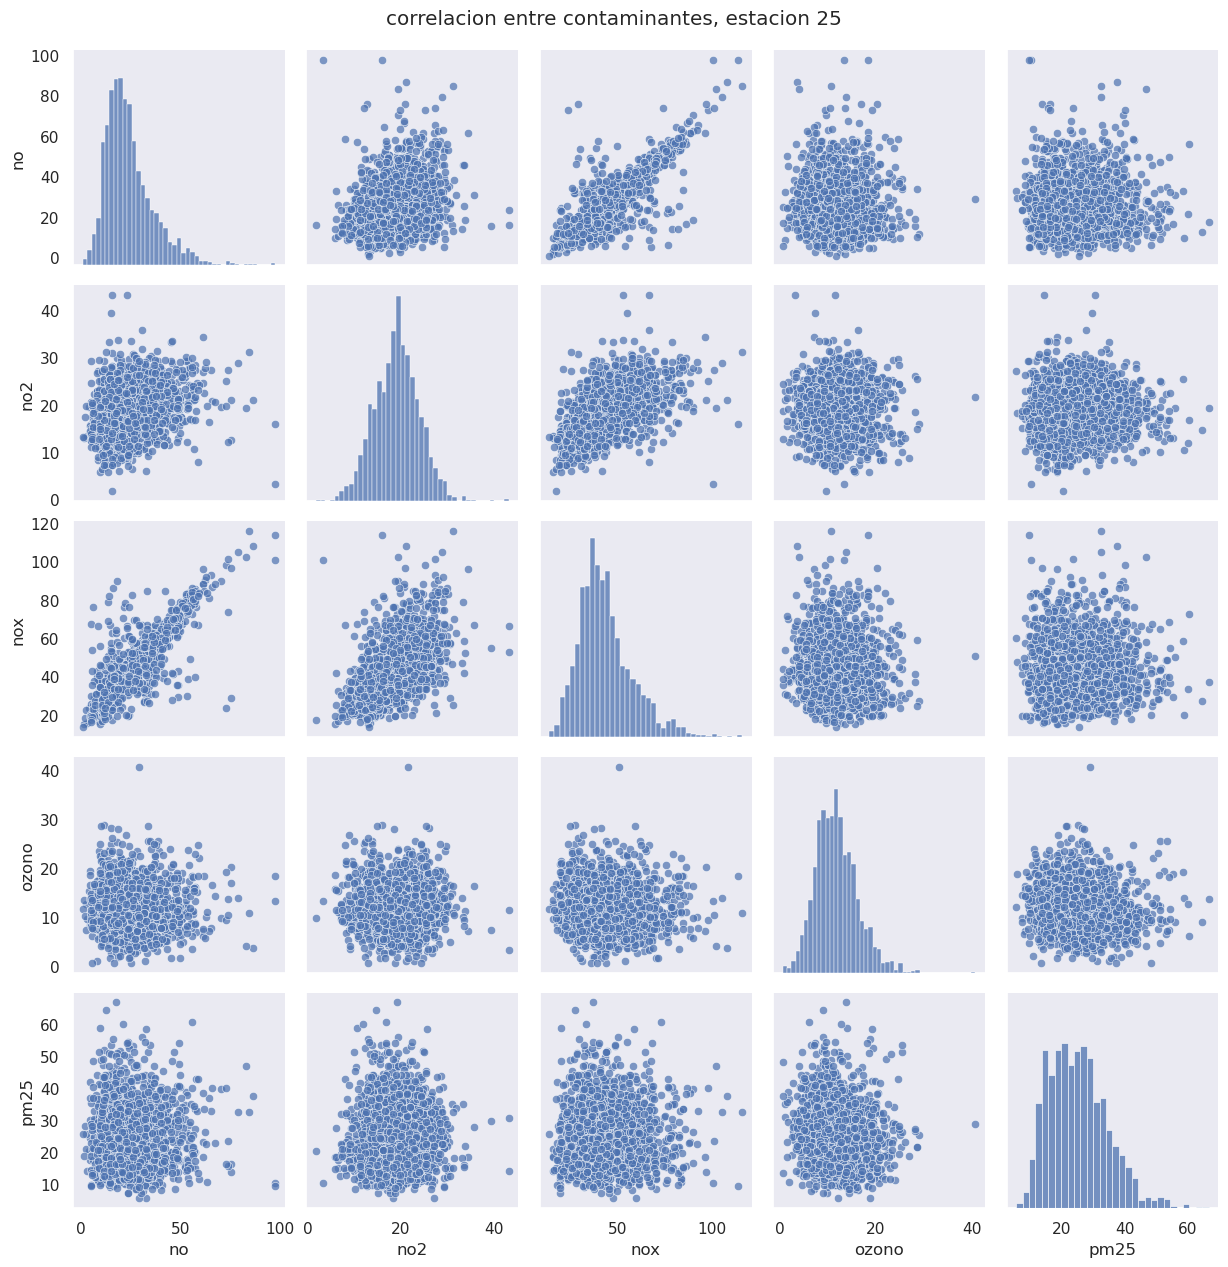

In [21]:
correlacionContaminantes(promedioDiarioContaminantes_df, 25)

## **Análisis por semana, correlación general**

In [22]:
promedio_semanal_contaminantes = datosContaminantes.groupby(["año", "semana", "estacion", "contaminante"]).mean()
promedio_semanal_contaminantes = promedio_semanal_contaminantes.reset_index()
fechas = addLists(
    promedio_semanal_contaminantes["año"], promedio_semanal_contaminantes["semana"]
)
promedio_semanal_contaminantes.insert(0, "Fecha", fechas)

promedio_semanal_contaminantes


,Fecha,año,semana,estacion,contaminante,dia,mes,Hora,valor_contaminante,calidad_contaminante,calidad
0,2012-38,2012,38,25,pm25,20.727273,9.0,12.045455,23.757576,1.0,1.0
1,2012-39,2012,39,25,pm25,27.000000,9.0,11.500000,24.970238,1.0,1.0
2,2012-40,2012,40,25,pm25,4.000000,10.0,11.500000,25.166667,1.0,1.0
3,2012-41,2012,41,25,pm25,11.359712,10.0,11.733813,30.071942,1.0,1.0
4,2012-42,2012,42,25,pm25,18.489362,10.0,11.563830,21.074468,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7547,2022-31,2022,31,6,nox,4.000000,8.0,11.500000,83.362565,1.0,1.0
7548,2022-32,2022,32,6,nox,11.000000,8.0,11.423313,71.502226,1.0,1.0
7549,2022-33,2022,33,6,nox,17.982036,8.0,11.544910,71.404375,1.0,1.0
7550,2022-34,2022,34,6,nox,25.024845,8.0,11.540373,77.548579,1.0,1.0


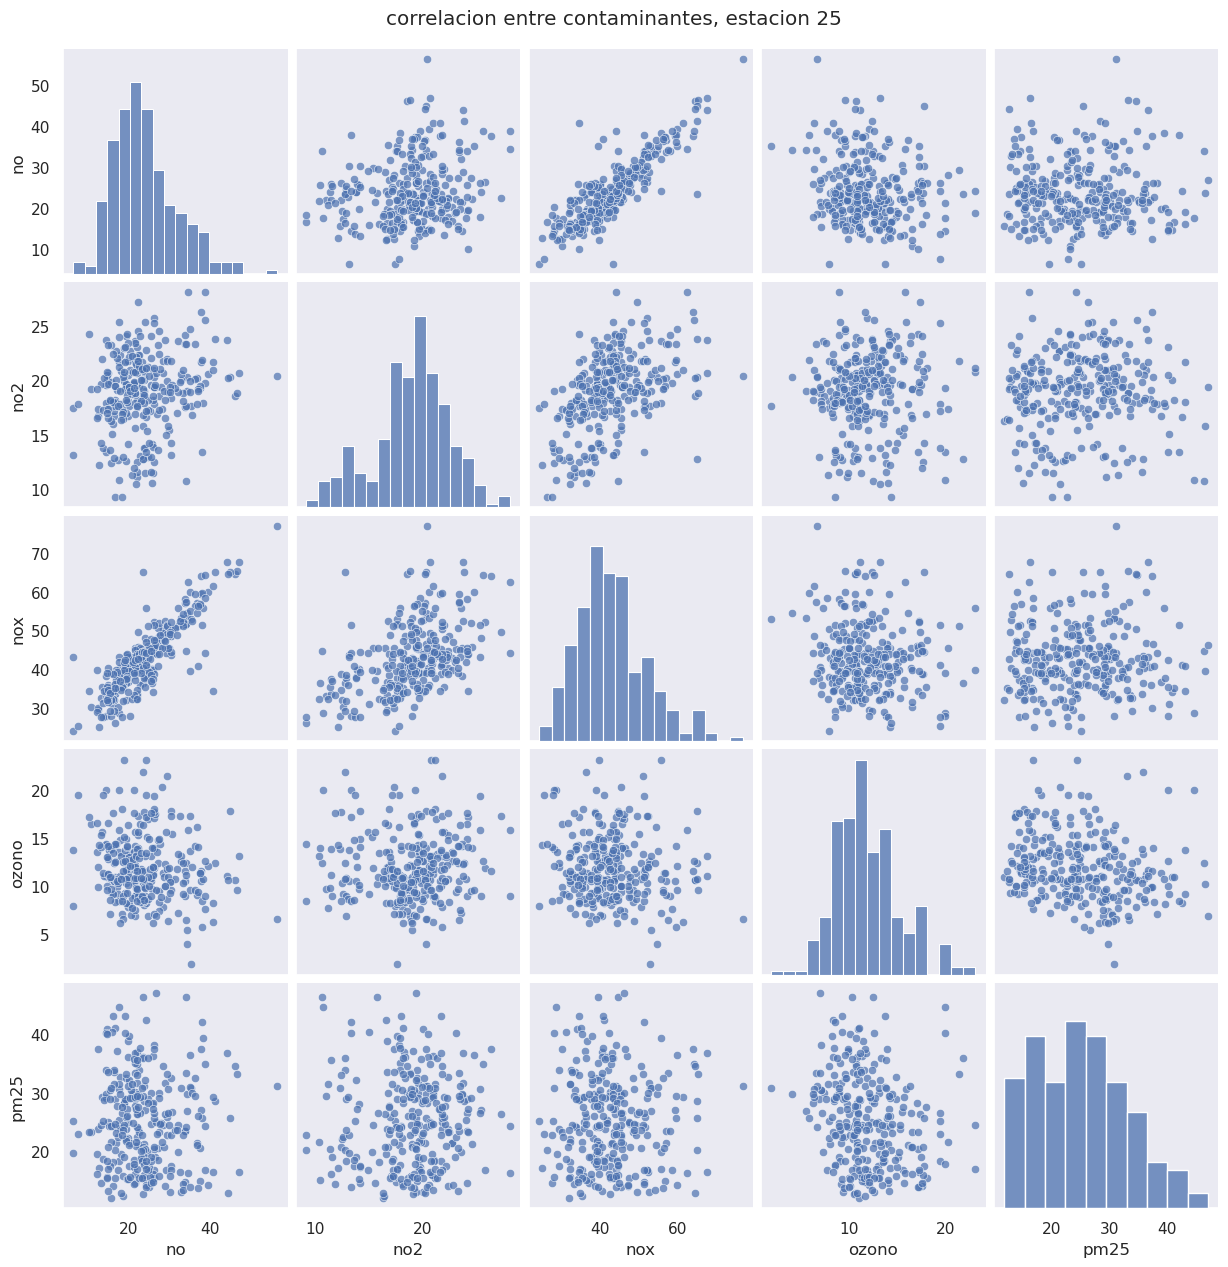

In [23]:
correlacionContaminantes(promedio_semanal_contaminantes, 25)

## **Análisis por hora, correlación general**

In [24]:
# se toma una semana de un año para analizar por horas en esa semana
year = 2020;  semana = 6

promedioHoraContaminantes_df = datosContaminantes[
    (datosContaminantes['año'] == year) & (datosContaminantes['semana'] == semana)
]

fechaHora = promedioHoraContaminantes_df.apply(
    lambda r : pd.Timestamp.combine(
        datetime.date(r['Fecha']),
        time(r['Hora'])
    ), 1
)

promedioHoraContaminantes_df.insert(2,'Fecha-hora', fechaHora)

promedioHoraContaminantes_df = promedioHoraContaminantes_df.groupby(["Fecha-hora", "Hora", "estacion", "contaminante"]).mean()
promedioHoraContaminantes_df = promedioHoraContaminantes_df.reset_index()

promedioHoraContaminantes_df

,Fecha-hora,Hora,estacion,contaminante,dia,semana,mes,año,valor_contaminante,calidad_contaminante,calidad
0,2020-02-10 00:00:00,0,6,co,10.0,6.0,2.0,2020.0,10.0000,1.0,1.0
1,2020-02-10 00:00:00,0,6,no,10.0,6.0,2.0,2020.0,10.0256,1.0,1.0
2,2020-02-10 00:00:00,0,6,no2,10.0,6.0,2.0,2020.0,16.6583,1.0,1.0
3,2020-02-10 00:00:00,0,6,nox,10.0,6.0,2.0,2020.0,26.6839,1.0,1.0
4,2020-02-10 00:00:00,0,6,pm10,10.0,6.0,2.0,2020.0,53.0000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3837,2020-02-16 23:00:00,23,80,pm25,16.0,6.0,2.0,2020.0,18.2375,1.0,1.0
3838,2020-02-16 23:00:00,23,83,pm25,16.0,6.0,2.0,2020.0,15.6474,1.0,1.0
3839,2020-02-16 23:00:00,23,84,pm25,16.0,6.0,2.0,2020.0,15.7838,1.0,1.0
3840,2020-02-16 23:00:00,23,85,pm25,16.0,6.0,2.0,2020.0,18.6737,1.0,1.0


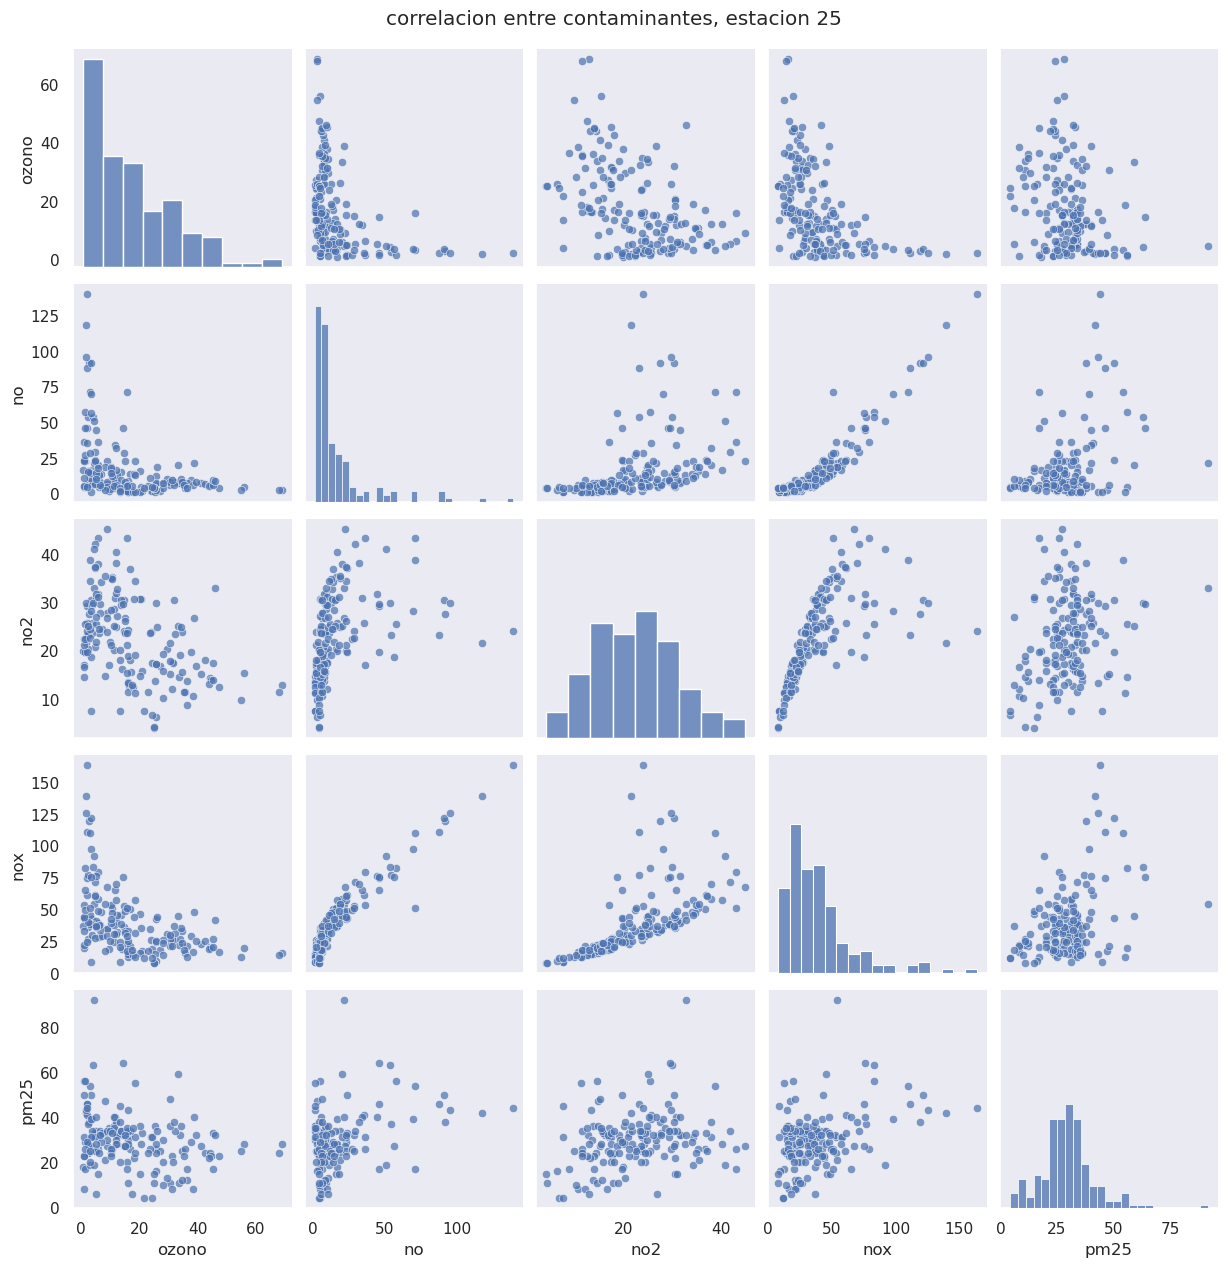

In [26]:
correlacionContaminantes(promedioHoraContaminantes_df, 25)

In [27]:
def timePlot(df, estacion, tiempo, contaminantes, valores=5, rango_x=30):
    
    #intervalo, eje_horizontal = xAxisFix(rango=rango_x)

    fig = plt.figure(figsize=(13, 14))
    ax = fig.add_subplot(212)

    #ax.xaxis.set_ticks(intervalo)  # valores uniformemente espaciados
    #ax.xaxis.set_ticklabels(eje_horizontal)  # nombres de fechas en el eje x
    #plt.xticks(rotation=45, fontsize=9)

    sns.set_theme(style='dark')
    
    for contaminante in contaminantes:

        fechas = np.array(df[
            (df['estacion'] == estacion) & \
            (df['contaminante'] == contaminante)
        ][tiempo])
	
        valores = np.array(df[
            (df['estacion'] == estacion) & \
            (df['contaminante'] == contaminante)
        ]['valor_contaminante'])

        plt.plot(
            fechas,
            valores,
            label=f'{contaminante}'
        )

    plt.grid(); plt.title(f'Estacion {estacion}', size=12); plt.legend()
    plt.xlabel('fecha', size=12);  plt.ylabel('valor contaminante', size=15)

    plt.show()

    pass

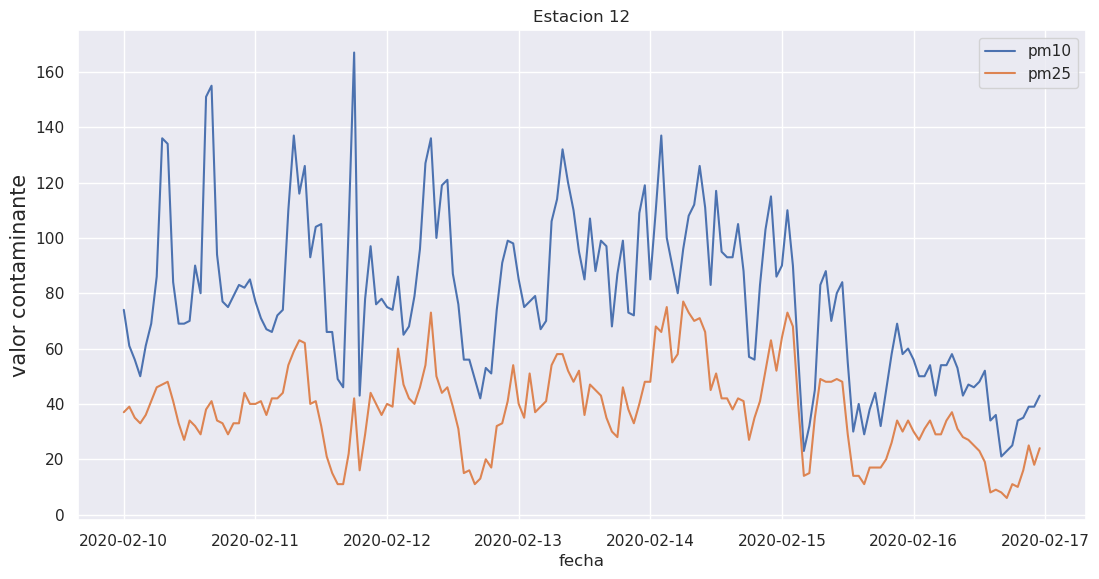

In [28]:
timePlot(promedioHoraContaminantes_df, 12, 'Fecha-hora', ['pm10', 'pm25'])

## **Correlación por estación**

Con el fin de analizar si existe relación alguna entre dos estaciones para un mismo contaminante, se ha implementado una función para determinar dicha relación, insertando el dataframe, el contaminante y las dos estaciones que se desea analizar.

In [35]:
def correlacionPorEstacion(df, contaminante, estacion_1, estacion_2):
    
    dataToX = np.array(df[
        (df["contaminante"] == contaminante) & (df["estacion"] == estacion_1)
    ]["valor_contaminante"])

    dataToY = np.array(df[
        (df["contaminante"] == contaminante) & (df["estacion"] == estacion_2)
    ]["valor_contaminante"])

    size = np.abs( len(dataToX) - len(dataToY) )

    if len(dataToX) > len(dataToY):
        dataToY = np.concatenate(
            ( dataToY, np.random.choice(dataToY, size) ), axis = 0
        )
    else:
        dataToX = np.concatenate(
            ( dataToX, np.random.choice(dataToX, size) ), axis = 0
        )
    
    fig = plt.figure(figsize=(8, 6))

    plt.scatter(
        dataToX, dataToY, alpha=0.6
    )

    plt.xlabel(f"estacion {estacion_1}"); plt.ylabel(f"estacion {estacion_2}")
    plt.title(f"correlación entre estaciones para contaminante {contaminante}")

    plt.grid(linestyle='--'); plt.tight_layout(); plt.show()

    pass

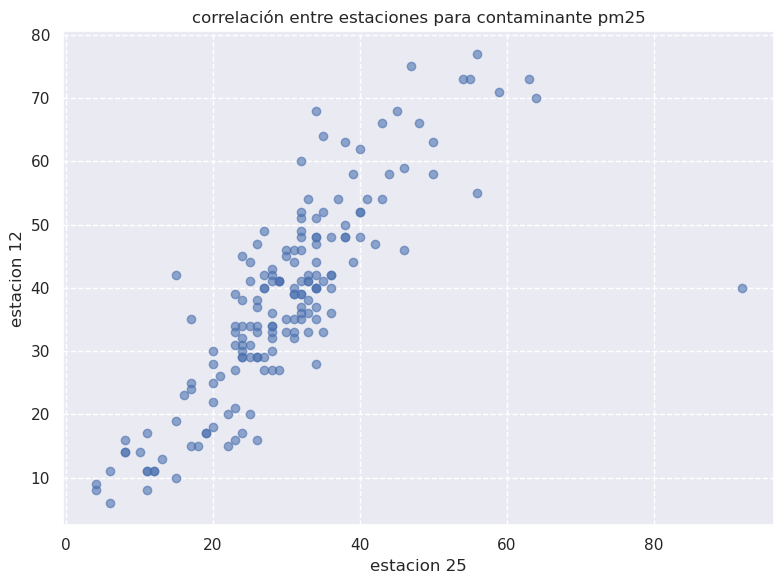

In [36]:
correlacionPorEstacion(promedioHoraContaminantes_df, "pm25", 25, 12)

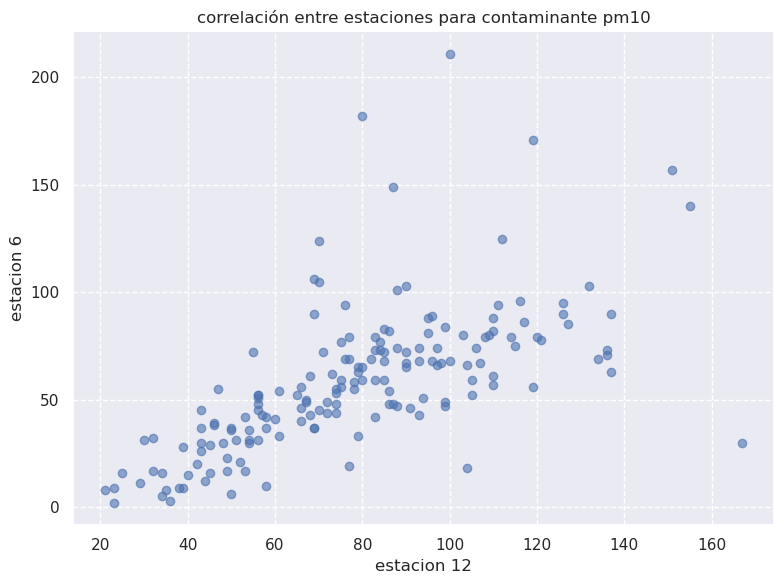

In [37]:
correlacionPorEstacion(promedioHoraContaminantes_df, "pm10", 12, 6)